# Sheet 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from numpy import linalg as LA
import umap
#from matplotlib import pyplot as plt
%matplotlib inline

## 1 Principal Component Analysis
### (a)

In [2]:
def pca(data, n_components=None):
    # n_components aka r
    """
    Principal Component Analysis on a p x N data matrix.
    
    Parameters
    ----------
    data : np.ndarray
        Data matrix of shape (p, N).
    n_components : int, optional
        Number of requested components. By default returns all components.
        
    Returns
    -------
    np.ndarray, np.ndarray
        the pca components (shape (n_components, p)) and the projection (shape (n_components, N))

    """
    # center the data
    data = data - data.mean()
    # eigenvalues w, eigenvectors v of X * X^T
    w, v = LA.eig(np.matmul(data, data.T))
    # eigenvectors sorted in order of increasing eigenvalues
    w_ind = np.unravel_index(np.argsort(w), w.shape)
    v_ordered = v[w_ind]
    # set n_components to p by default
    n_components = data.shape[0] if n_components is None else n_components
    assert n_components <= data.shape[0], f"Got n_components larger than dimensionality of data!"
    # return last r eigenvectors in v_ordered
    # compute PCA components
    '''the following two loops should be vectorized numpy operations'''
    components = np.array([v_ordered[-(i+1)] for i in range(n_components)])
    # compute X_projected, the projection of the data to the components
    X_projected = np.array([data[i] for i in reversed(np.unravel_index(np.flip(np.argsort(w)[-n_components:]), w.shape))])[0]
    # return the n_components first components and the pca projection of the data
    return components, X_projected

def pca(data, n_components=None):
    """
    Principal Component Analysis on a p x N data matrix.
    
    Parameters
    ----------
    data : np.ndarray
        Data matrix of shape (p, N).
    n_components : int, optional
        Number of requested components. By default returns all components.
        
    Returns
    -------
    np.ndarray, np.ndarray
        the pca components (shape (n_components, p)) and the projection (shape (n_components, N))

    """
    # set n_components to p by default
    n_components = data.shape[0] if n_components is None else n_components
    assert n_components <= data.shape[0], f"Got n_components larger than dimensionality of data!"
    
    N = data.shape[1] #Anzahl Messwerte (column)
    F = data.shape[0] #Anzahl Features (row)
    X = data
    
    # center the data
    x_mean = 1/N * np.sum(X, axis=1)
    X_center = (X.T-x_mean).T
    
    # compute X times X transpose
    Cov = 1/N * (X_center) @ (X_center).T # Covarianzmatrix
   
    # sort the eigenvectors by eigenvalue and take the n_components largest ones
    eigval, eigvec = np.linalg.eigh(Cov)
    
    eig = dict(zip(eigval,eigvec))
    sort_eig = dict(sorted(eig.items(), reverse=True)) # Sortiere nach Größe der Eigenvalues
    components = np.array(list(sort_eig.values()))[:n_components, :]    # compute the eigenvectors and eigenvalues
    #print("val", eigval,"vec",eigvec,"eig",eig,"sort",sort_eig)
    
    X_projected = components @ X_center
    # compute X_projected, the projection of the data to the components
    #print(components)
    return components, X_projected  # return the n_components first components and the pca projection of the data

In [3]:
# Example data to test your implementation 
# All the asserts on the bottom should go through if your implementation is correct

data = np.array([
    [ 1,  0,  0, -1,  0,  0],
    [ 0,  3,  0,  0, -3,  0],
    [ 0,  0,  5,  0,  0, -5]
], dtype=np.float32)

# add a random offset to all samples. it should not affect the results
# data += np.random.randn(data.shape[0], 1)

n_components = 2
components, projection = pca(data, n_components=n_components)  # apply your implementation

# the correct results are known (up to some signs)
true_components = np.array([[0, 0, 1], [0, 1, 0]], dtype=np.float32)
true_projection = np.array([
    [ 0,  0,  5,  0,  0, -5],
    [ 0,  3,  0,  0, -3,  0]
], dtype=np.float32)

# check that components match, up to sign
assert isinstance(components, np.ndarray), f'Expected components to be numpy array but got {type(components)}'
assert components.shape == true_components.shape, f'{components.shape}!={true_components.shape}'
assert np.allclose(np.abs(components * true_components).sum(1), np.ones(n_components)), f'Components not matching'

# check that projections agree, taking into account potentially flipped components
assert isinstance(projection, np.ndarray), f'Expected projection to be numpy array but got {type(projection)}'
assert projection.shape == (n_components, data.shape[1]), f'Incorrect shape of projection: Expected {(n_components, data.shape[1])}, got {projection.shape}'
assert np.allclose(projection, true_projection * (components * true_components).sum(1, keepdims=True), atol=1e-6), f'Projections not matching'

print('Test successful! WE CAN SLEEP!')

Test successful! WE CAN SLEEP!


### (b)

Load the data (it is a subset of the data at https://opendata.cern.ch/record/4910#)

In [4]:
features = np.load('data/dijet_features.npy')
labels = np.load('data/dijet_labels.npy')
label_names = ['b', 'c', 'q']  # bottom, charm or light quarks

import sys
np.set_printoptions(threshold=sys.maxsize)
print(f'{features.shape}, {labels.shape}', '\n')  # print the shapes

# TODO: print how many samples of each class are present in the data (hint: numpy.unique)
label_counts = np.unique(labels, return_counts = True)[1]
for i in range(len(label_counts)):
    print ('Feature', i, 'appears', label_counts[i], 'times.')

(116, 2233), (2233,) 

Feature 0 appears 999 times.
Feature 1 appears 864 times.
Feature 2 appears 370 times.


Normalize the data

In [5]:
x = (np.random.rand(5, 10)*10).round()
print(x)

[[ 7.  2.  7.  2.  9.  9.  0.  4.  9.  2.]
 [ 7.  1.  5.  2.  6.  6.  7.  3.  2.  7.]
 [ 4.  7.  5.  7.  0.  4.  5.  5.  8.  5.]
 [ 7.  1.  0.  9.  7.  8.  9.  4.  2.  7.]
 [10.  9.  1.  4.  7.  8.  0.  1.  3.  5.]]


In [6]:
x_column_mean = np.mean(x, axis = 1, keepdims = True).round()
print('Mean of the 5 columns\n', x_column_mean,"\n")
x_centered = x - x_column_mean
print('Centered: \n', x_centered)
print('Mean of centered matrix: \n', x_centered.mean())
x_cent_norm = x_centered / np.std(x, axis=1, keepdims=True)
print('Centered and normalized:\n', x_cent_norm)

Mean of the 5 columns
 [[5.]
 [5.]
 [5.]
 [5.]
 [5.]] 

Centered: 
 [[ 2. -3.  2. -3.  4.  4. -5. -1.  4. -3.]
 [ 2. -4.  0. -3.  1.  1.  2. -2. -3.  2.]
 [-1.  2.  0.  2. -5. -1.  0.  0.  3.  0.]
 [ 2. -4. -5.  4.  2.  3.  4. -1. -3.  2.]
 [ 5.  4. -4. -1.  2.  3. -5. -4. -2.  0.]]
Mean of centered matrix: 
 -0.02
Centered and normalized:
 [[ 0.60606061 -0.90909091  0.60606061 -0.90909091  1.21212121  1.21212121
  -1.51515152 -0.3030303   1.21212121 -0.90909091]
 [ 0.89087081 -1.78174161  0.         -1.33630621  0.4454354   0.4454354
   0.89087081 -0.89087081 -1.33630621  0.89087081]
 [-0.47673129  0.95346259  0.          0.95346259 -2.38365647 -0.47673129
   0.          0.          1.43019388  0.        ]
 [ 0.625      -1.25       -1.5625      1.25        0.625       0.9375
   1.25       -0.3125     -0.9375      0.625     ]
 [ 1.47058824  1.17647059 -1.17647059 -0.29411765  0.58823529  0.88235294
  -1.47058824 -1.17647059 -0.58823529  0.        ]]


In [7]:
# TODO: subtract the mean of each feature to center the data
features_centered = features - np.mean(features, axis=1, keepdims=True)
# TODO: divide by the standard deviation of each feature to normalize the variance
features_cent_norm = features_centered / np.std(features, axis=1, keepdims=True)

### (c)
Compute a 2D PCA projection and make a scatterplot of the result, once without color, once coloring the dots by label

(2, 2233)


<Figure size 1500x1500 with 0 Axes>

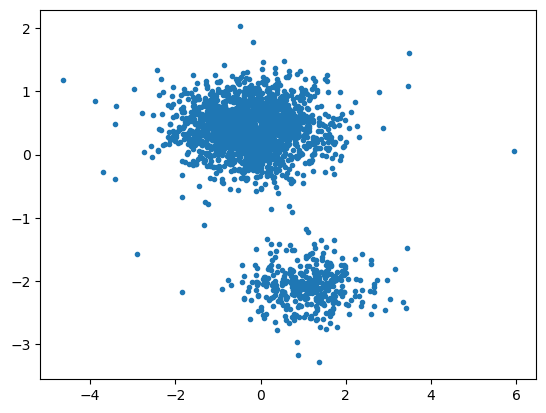

In [8]:
components, projection = pca(features_cent_norm, 2)
print(projection.shape)
x=projection[0]
y=projection[1]
plt.figure(figsize=(15,15))

fig, ax = plt.subplots(1)
plt.scatter(x, y, marker='.') #more args for prettier plots
#ax.set_aspect('equal')
plt.show()

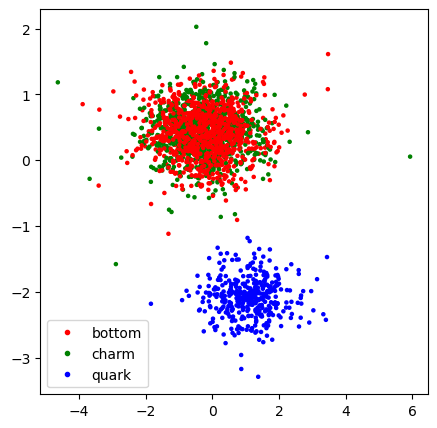

In [9]:
# TODO: apply PCA as implemented in (a)
components, projection = pca(features_cent_norm, 2)
x=projection[0]
y=projection[1]
colors = np.array(['red', 'green', 'b'])
# n = number of observations
n = len(x)
#c = np.random.randint(3, size=n)
c = colors[labels.astype(int)]
plt_labels = ['bottom', 'charm', 'quark']

fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(x, y, c=c, s=5) #more args for prettier plots
plt.legend(handles = [plt.Line2D([], [], color=c,ls="", marker=".") for c in colors], labels=plt_labels)
#ax.set_aspect('equal')
plt.show()

In [10]:
# TODO: make a scatterplot of the PCA projection


In [11]:
# TODO: make a scatterplot, coloring the dots by their label and including a legend with the label names
# (hint: one way is to call plt.scatter once for each of the three possible labels)


## 2 Nonlinear Dimension Reduction

In [12]:
#import umap  # import umap-learn, see https://umap-learn.readthedocs.io/

In [13]:
# if you have not done 1(b) yet, you can load the normalized features directly:
features = np.load('data/dijet_features_normalized.npy')
labels = np.load('data/dijet_labels.npy')
label_names = ['b', 'c', 'q']  # bottom, charm or light quarks

### (a)

In [14]:
# TODO: Apply umap on the normalized jet features from excercise 1. It will take a couple of seconds.
# note: umap uses a different convention regarding the feature- and sample dimension, N x p instead of p x N!

reducer = umap.UMAP()
embedding = reducer.fit_transform(features.T).T

<Figure size 1200x1200 with 0 Axes>

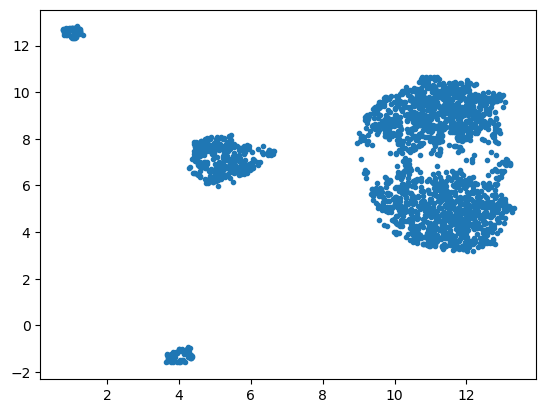

In [15]:
# TODO: make a scatterplot of the UMAP projection

x=embedding[0]
y=embedding[1]

plt.figure(figsize = (12,12))
fig, ax = plt.subplots(1)
plt.scatter(x, y, marker='.') #more args for prettier plots
#ax.set_aspect('equal')
plt.show()

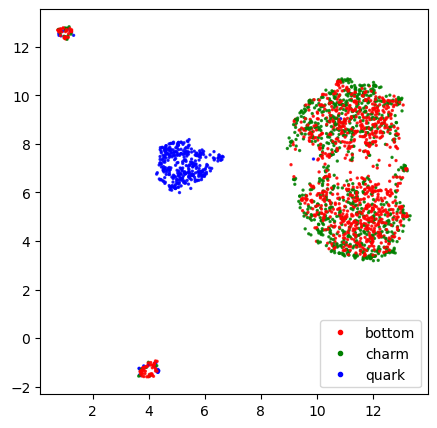

In [16]:
# TODO: make a scatterplot, coloring the dots by their label and including a legend with the label names
# (hint: one way is to call plt.scatter once for each of the three possible labels)

x=embedding[0]
y=embedding[1]
colors = np.array(['red', 'green', 'b'])
# n = number of observations
n = len(x)
#c = np.random.randint(3, size=n)
c = colors[labels.astype(int)]
plt_labels = ['bottom', 'charm', 'quark']

fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(x, y, c=c, s=2, alpha =0.8) #more args for prettier plots
plt.legend(handles = [plt.Line2D([], [], color=c,ls="", marker=".") for c in colors], labels=plt_labels)
#ax.set_aspect('equal')
plt.show()

### (b)

/Users/aaron/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:369: UserWarning: Exited at iteration 399 with accuracies 
[2.00199866e-14 1.65935238e-05 3.96417908e-05 9.81168866e-06]
not reaching the requested tolerance 1e-05.
  _, diffusion_map = lobpcg(
/Users/aaron/anaconda3/lib/python3.9/site-packages/umap/spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


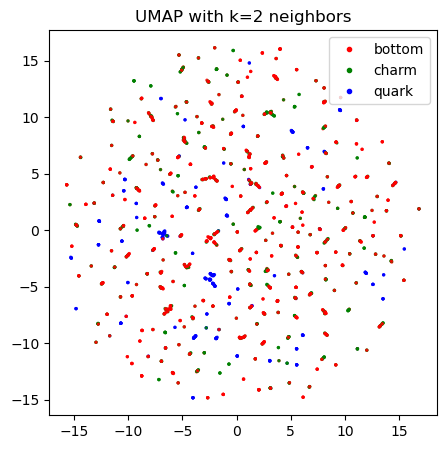

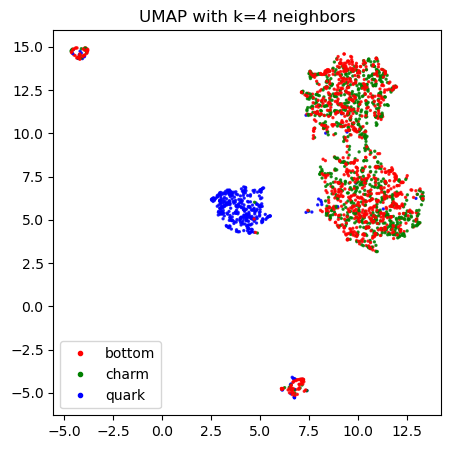

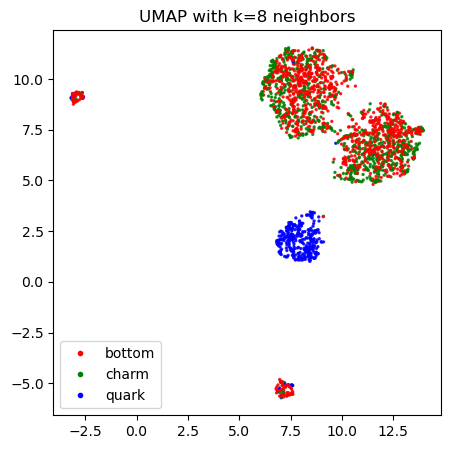

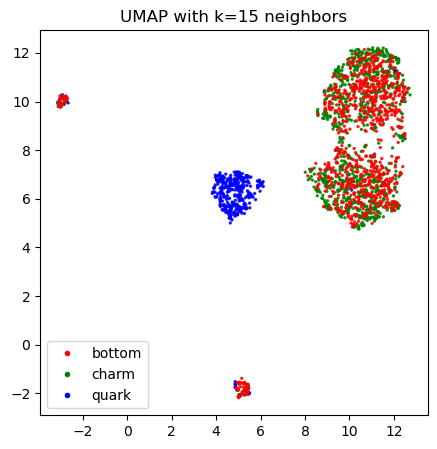

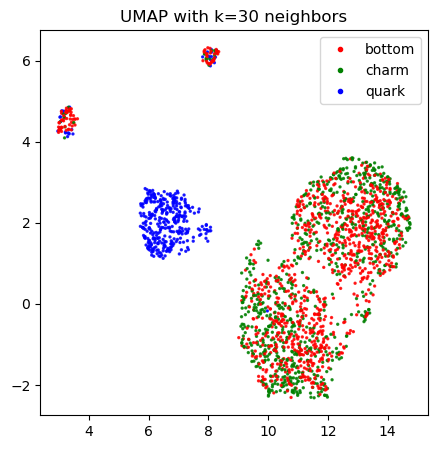

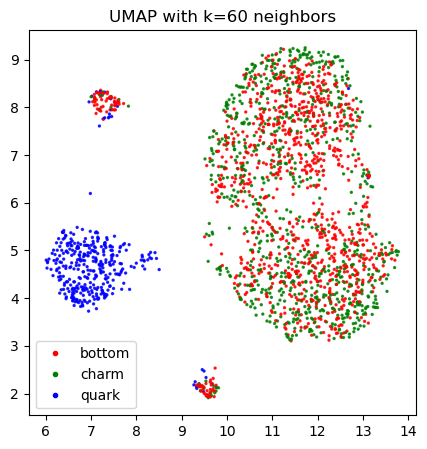

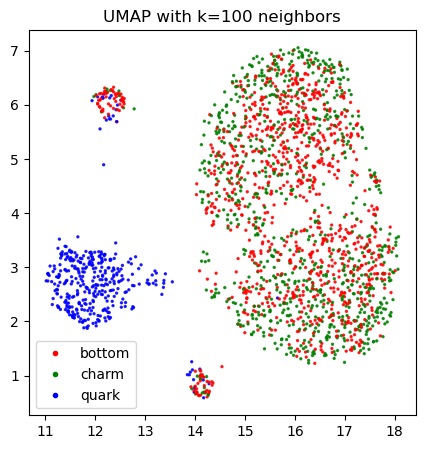

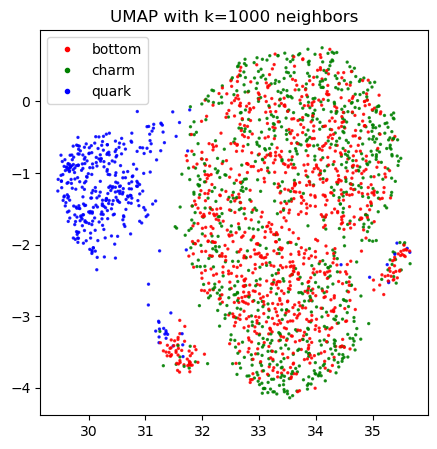

/Users/aaron/anaconda3/lib/python3.9/site-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


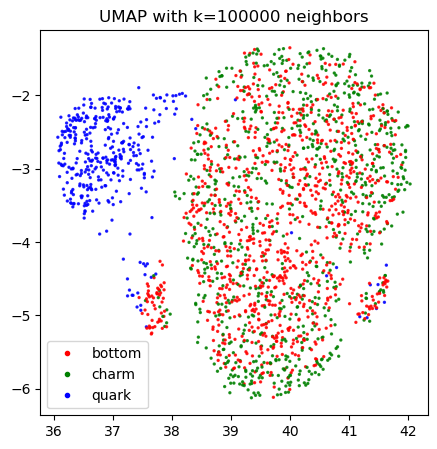

In [17]:
for n_neighbors in (2, 4, 8, 15, 30, 60, 100, 10**3, 10**5):
    # TODO: repeat the above, varying the n_neighbors parameter of UMAP
    reducer = umap.UMAP(n_neighbors=n_neighbors)
    embedding = reducer.fit_transform(features.T).T
    x=embedding[0]
    y=embedding[1]
    colors = np.array(['red', 'green', 'b'])
    # n = number of observations
    n = len(x)
    #c = np.random.randint(3, size=n)
    c = colors[labels.astype(int)]
    plt_labels = ['bottom', 'charm', 'quark']

    fig, ax = plt.subplots(figsize=(5,5))
    plt.scatter(x, y, c=c, s=2, alpha =0.8) #more args for prettier plots
    plt.legend(handles = [plt.Line2D([], [], color=c,ls="", marker=".") for c in colors], labels=plt_labels)
    #ax.set_aspect('equal')
    plt.title(f"UMAP with k={str(n_neighbors)} neighbors")
    plt.show()

### (c)

/Users/aaron/anaconda3/lib/python3.9/site-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


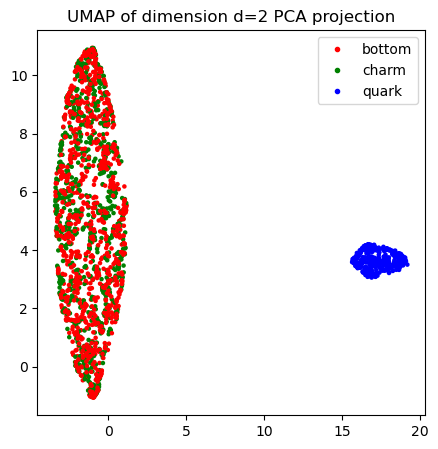

/Users/aaron/anaconda3/lib/python3.9/site-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


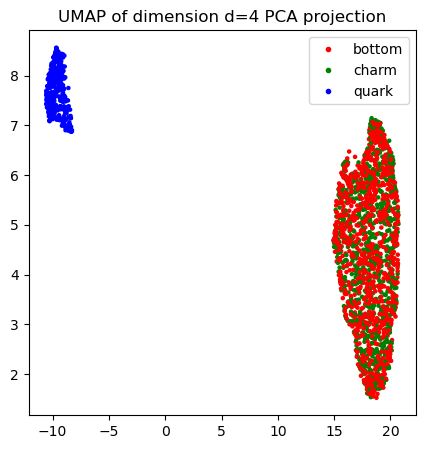

/Users/aaron/anaconda3/lib/python3.9/site-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


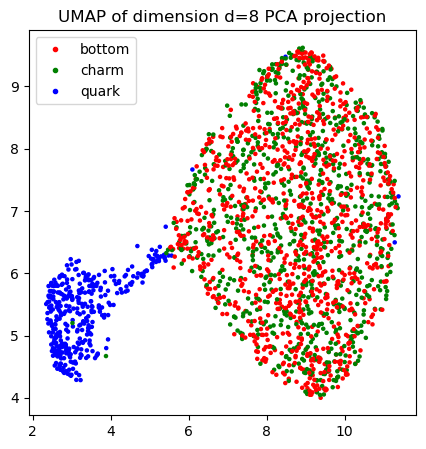

/Users/aaron/anaconda3/lib/python3.9/site-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


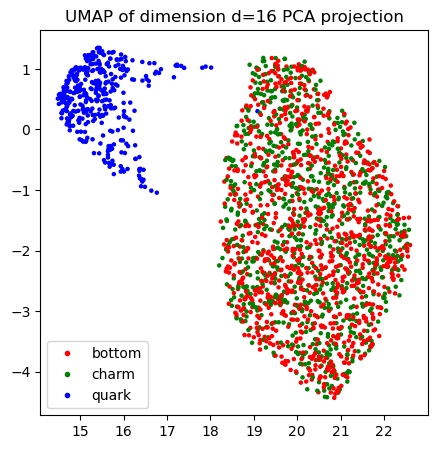

/Users/aaron/anaconda3/lib/python3.9/site-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


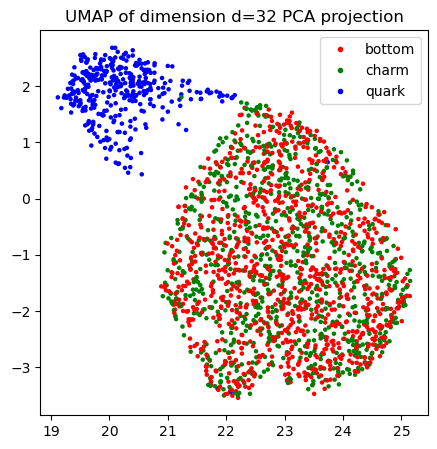

/Users/aaron/anaconda3/lib/python3.9/site-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


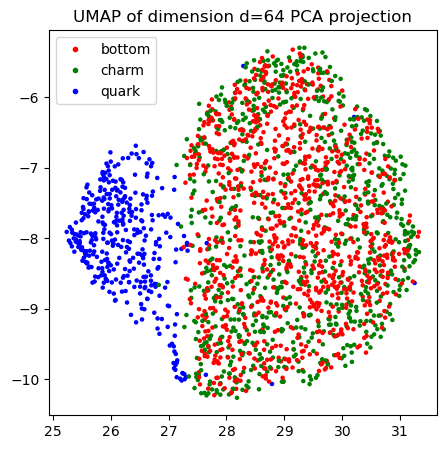

/Users/aaron/anaconda3/lib/python3.9/site-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


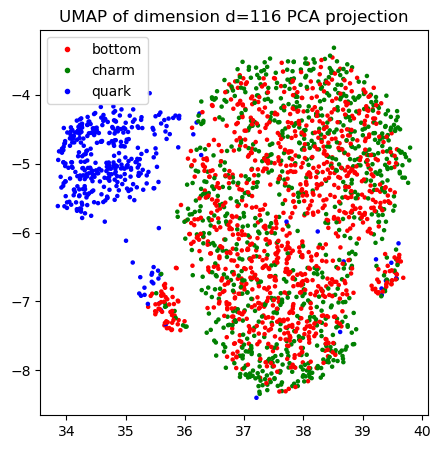

In [18]:
for n_components in (2, 4, 8, 16, 32, 64, len(features)):
    # TODO: project to the n-components first principal components 
    #       (use your implementation from ex. 1 or PCA from scikit-learn)
    components, projection = pca(features, n_components)
    # TODO: apply UMAP to get from n_components to just two dimensions
    embedding = reducer.fit_transform(projection.T).T
    # TODO: again, make scatterplots as before
    x=embedding[0]
    y=embedding[1]
    colors = np.array(['red', 'green', 'b'])
    # n = number of observations
    n = len(x)
    #c = np.random.randint(3, size=n)
    c = colors[labels.astype(int)]
    plt_labels = ['bottom', 'charm', 'quark']

    fig, ax = plt.subplots(figsize=(5,5))
    plt.scatter(x, y, c=c, s=5) #more args for prettier plots
    plt.legend(handles = [plt.Line2D([], [], color=c,ls="", marker=".") for c in colors], labels=plt_labels)
    #ax.set_aspect('equal')
    plt.title(f"UMAP of dimension d={str(n_components)} PCA projection")
    plt.show()